In [10]:
import numpy as np
import seaborn as sns
from numpy.linalg import svd, eigh
import matplotlib.pylab as plt
%matplotlib inline

In [11]:
def scaled(e,norm):
    """ Scales/normalizes the eigenvalues """
    
    if norm:
        return (e - np.mean(e))/np.std(e)
    else:
        return (e - min(e))/(max(e) - min(e))

In [12]:
def power_iters(k,A):
    """ Calculates power iterations for matrix A """
    
    if k > 1:
        A_temp = A
        for i in range(1,k):
            A = np.dot(A.T,A_temp)
    
    return A

In [13]:
def plot_eigendecay(A, iters):
    """ Plot the eigenvalue decay for various power iterations of matrix A """

    for i in iters:
        A = power_iters(i,A)

        M = A - A.mean(0)
        U, S, V = svd(M)
        eigenvalues = np.square(S)

        plt.plot(scaled(eigenvalues, norm=False),label = "q={}".format(i),linewidth=2)

    plt.title("Scaled Eigenvalue Decay as\n power iterations (q) increase",size=14)
    plt.ylabel("Scaled Eigenvalue",size=12)
    plt.xlabel("Ordered Eigenvalues",size=12)
    plt.legend(loc='best')
    plt.show()

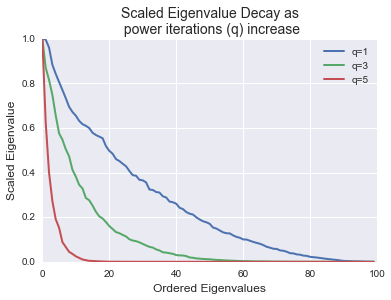

In [14]:
# parameters
iters = np.array([1,3,5])
A = np.random.normal(0,1,10000).reshape(100,100)

# main plotting function
plot_eigendecay(A, iters)